# download the data 

## this would download the data online everytime below code runs.

In [157]:
import urllib 
import os 
import tarfile
from time import sleep

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,8)
%matplotlib inline

from zlib import crc32

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
pwd

'C:\\Users\\user\\Documents\\Python Scripts\\Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow,2nd_Edition\\Chapter 2 End-to-End Machine Learning'

In [3]:
DOWNLOAD_ROOT = 'https://github.com/ageron/handson-ml2/blob/master/'

DIRECTORY_RAW_ROOT = os.getcwd()
DIRECTORY_ROOT = os.path.join(DIRECTORY_RAW_ROOT,'coding')

URL_DATASET_HOUSE = DOWNLOAD_ROOT + '/datasets/housing/housing.tgz' 

In [4]:
DIRECTORY_ROOT

'C:\\Users\\user\\Documents\\Python Scripts\\Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow,2nd_Edition\\Chapter 2 End-to-End Machine Learning\\coding'

In [5]:
URL_DATASET_HOUSE

'https://github.com/ageron/handson-ml2/blob/master//datasets/housing/housing.tgz'

In [6]:
def updateDataset(url, filePath):
    filePathTGZ = os.path.join(filePath, 'housing.tgz')
    
    
#     urllib.request.urlretrieve(url, filename= filePathTGZ)   # this is not working
#     sleep(4)

    print("file saved to path: ", filePathTGZ)
    housingTGZ = tarfile.open(filePathTGZ)
    housingTGZ.extractall(path= filePath)
    housingTGZ.close()
    
    

In [7]:
updateDataset(URL_DATASET_HOUSE, DIRECTORY_ROOT)

file saved to path:  C:\Users\user\Documents\Python Scripts\Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow,2nd_Edition\Chapter 2 End-to-End Machine Learning\coding\housing.tgz


## function loads the data

In [8]:
def load_housing_data():
    path = os.path.join(DIRECTORY_ROOT, 'housing.csv')
    df = pd.read_csv(path)
    return df

In [9]:
df = load_housing_data()

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Take a quick look to data

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**values that are caped:**

- total_rooms
- total_bedrooms
- househols
- median income

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

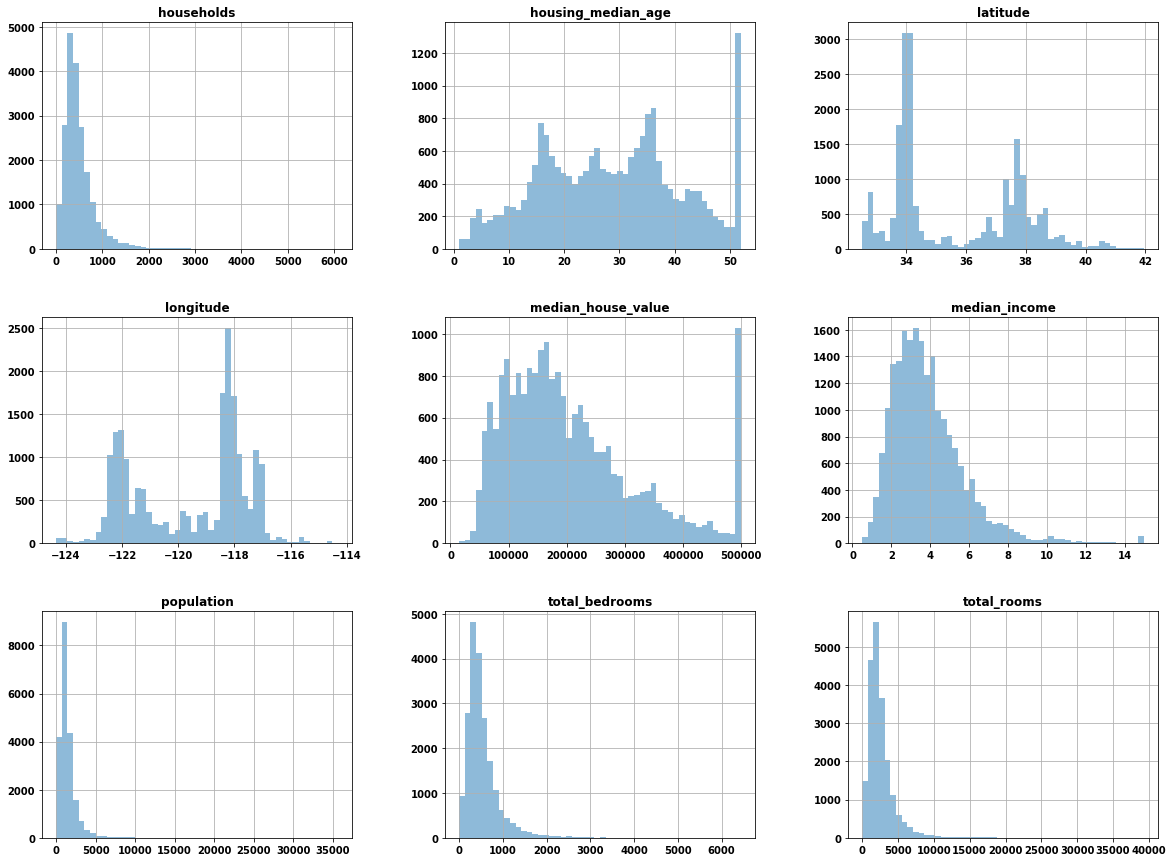

In [14]:
df.hist(figsize=(20,15), bins=50, alpha = 0.5)
plt.show()

# create test set

In [15]:
def split_train_test(arr, ratio, random_seed = 101):
    np.random.seed(random_seed)
    size = int(len(arr) * ratio)
    
    arr = np.random.permutation(arr)
    train = arr[size:]
    test = arr[:size]
    print('train len:', len(train), 'test len:', len(test))
    
    return train, test

In [16]:
train, test = split_train_test(df, 0.2, 101)

train len: 16512 test len: 4128


In [17]:
# np.int64(df.iloc[6])

def test_set_check(identifier, testRatio):
    rer = crc32(np.int64(identifier))& 0x0ffffffff  < testRatio * 2**32
#     print(identifier)
#     print("np.int64: ", np.int64(identifier))
#     print("crc32:", crc32(np.int64(identifier)))
#     print("0xffffffff:", crc32(np.int64(identifier))& 0x0ffffffff)
#     print("testRatio:", testRatio * 2**32)
    return rer


def split_train_test_by_id(arr, ratio, id_column, random_seed = 101):
    ids = arr[id_column]
    inTestSet = ids.apply(lambda id_: test_set_check(id_, ratio))
    return arr.loc[~inTestSet], arr.loc[inTestSet]

In [18]:
dfWithId = df.reset_index()

dfWithId.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
train, test = split_train_test_by_id(dfWithId, 0.2, 'index', random_seed=101)

print("train len:", len(train), "test len:",len(test))

train len: 16512 test len: 4128


## Use long + lati as id

In [20]:
dfWithId['id'] = df['longitude'] * 100 + df['latitude']


dfWithId

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-12185.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-12184.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-12186.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-12187.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-12187.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-12069.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-12081.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-12082.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-12092.57


In [21]:
train, test = split_train_test_by_id(dfWithId, 0.2, 'id', random_seed=101)

print("train len:", len(train), "test len:",len(test))

train len: 16406 test len: 4234


# Stratum

In [22]:
df['income_cat'] = pd.cut(df['median_income'], [0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1,2,3,4,5])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


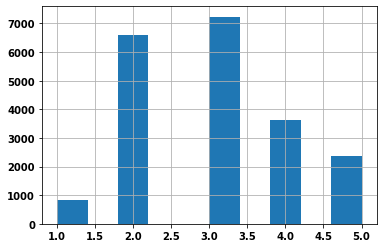

In [23]:
df['income_cat'].hist()

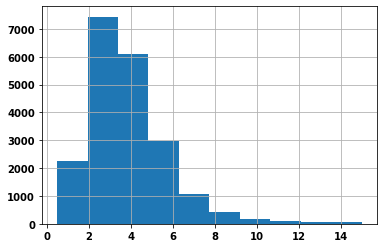

In [24]:
df['median_income'].hist()

# Gain more insights

In [25]:
housing = train.copy()

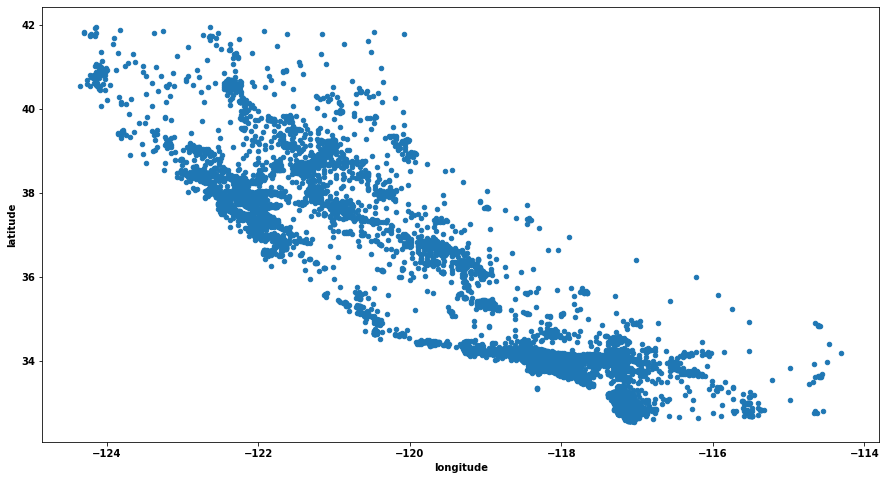

In [26]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(15,8))

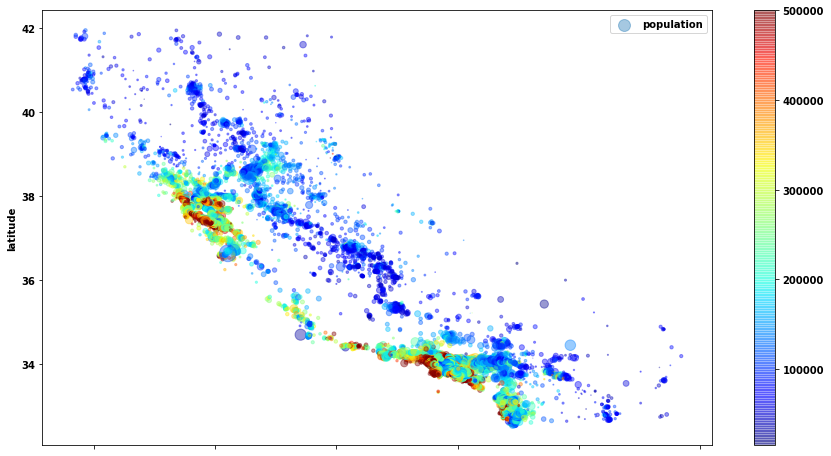

In [27]:
# add more detail to graph

housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(15,8), alpha=0.4, 
             s=housing['population']/100, c=housing['median_house_value'], cmap='jet', colorbar=True, label='population')
plt.show()

In [28]:
# looking at the correlation

housingCorr = housing.drop('index', axis=1).corr()

In [29]:
housingCorr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.696185
total_rooms           0.133515
housing_median_age    0.099620
households            0.063318
total_bedrooms        0.047475
population           -0.023700
longitude            -0.033882
id                   -0.035894
latitude             -0.154927
Name: median_house_value, dtype: float64

# corr scatterplot

In [30]:
from pandas.plotting import scatter_matrix
import seaborn as sns

In [31]:
housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-12185.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-12184.14
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-12187.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-12187.15
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-12187.15


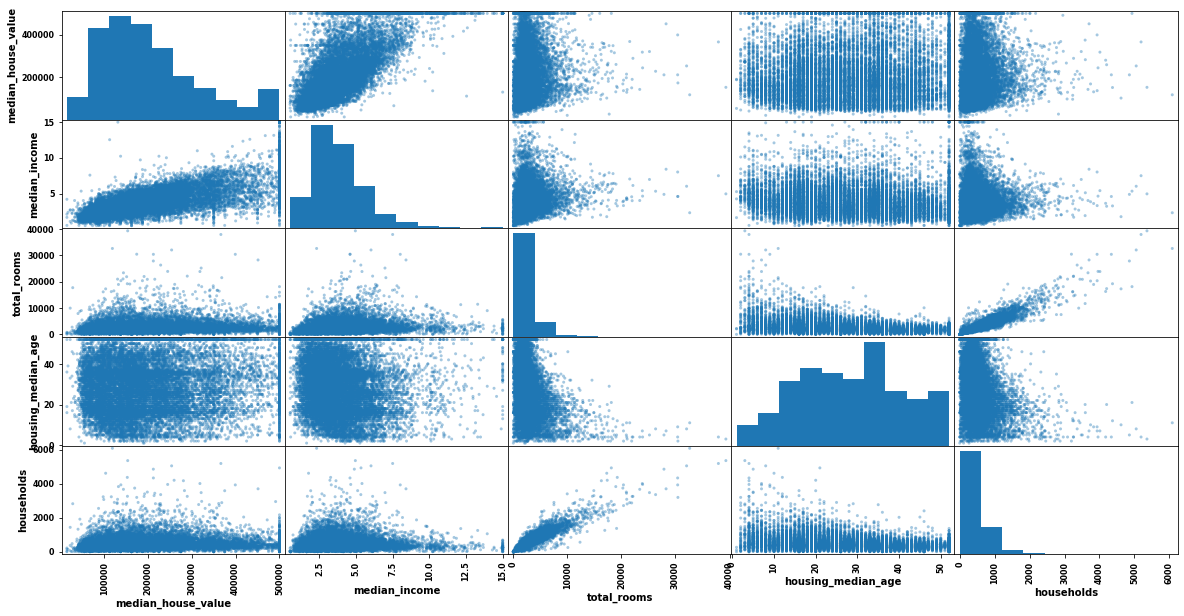

In [32]:
corrColumns = ['median_house_value','median_income','total_rooms','housing_median_age','households']
scatter_matrix(housing[corrColumns], figsize=(20,10), alpha=0.4)
plt.show()

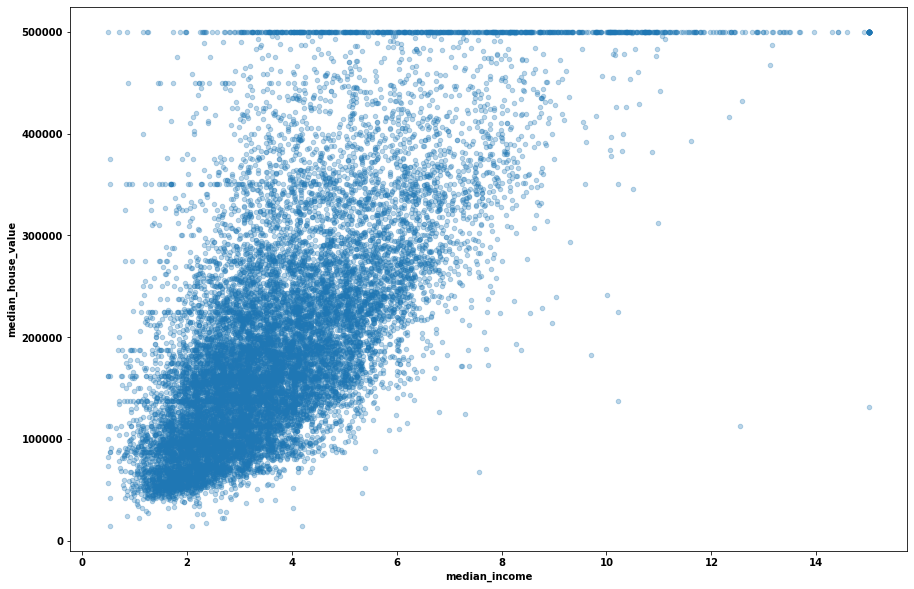

In [33]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(15,10), alpha=0.3)

In [34]:
# found total 7 horizontal lines that likely to be removed.

# combining attributes togather and experimentation

In [35]:
housing.drop(['id','index'],axis=1, inplace=True)

In [36]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


In [37]:
housing['bedroom_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['population_per_household'] = housing['population']/housing['households']

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_per_room,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,2.109842
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,0.231774,4.761658,2.139896


In [38]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.696185
rooms_per_household         0.150085
total_rooms                 0.133515
housing_median_age          0.099620
households                  0.063318
total_bedrooms              0.047475
population_per_household   -0.018754
population                 -0.023700
longitude                  -0.033882
latitude                   -0.154927
bedroom_per_room           -0.262200
Name: median_house_value, dtype: float64

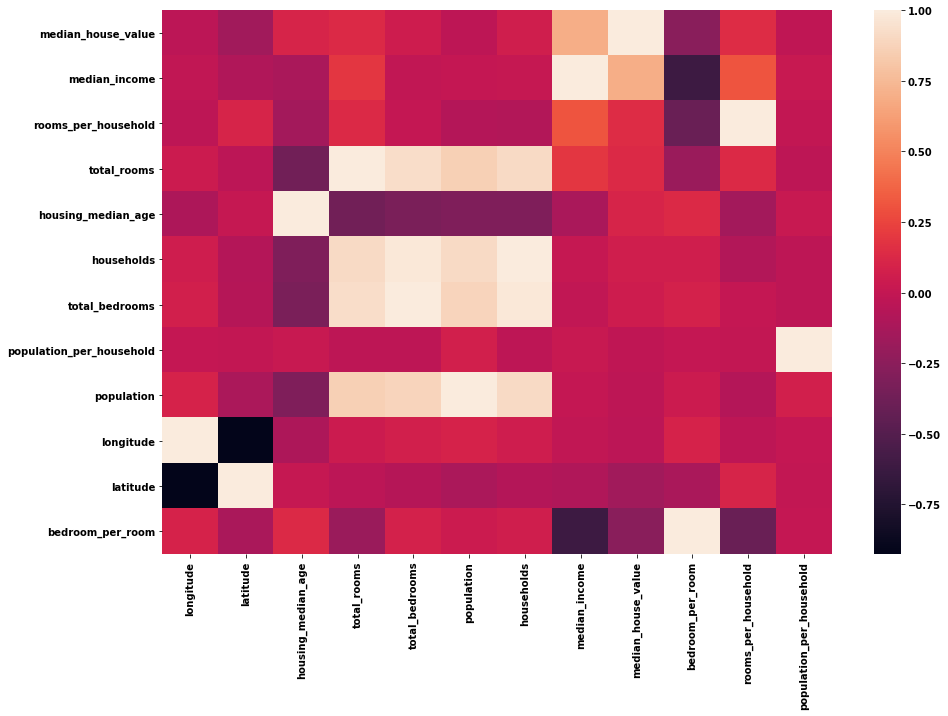

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(housing.corr().sort_values(by='median_house_value', ascending=False), )
plt.show()

# strat train test splits

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

In [41]:
strait = StratifiedShuffleSplit(n_splits=1, random_state=101, test_size=0.2)

In [42]:
for train_index, test_index in strait.split(df, df['income_cat']):
    trainStrait = df.loc[train_index]
    testStrait = df.loc[test_index]
    

In [43]:
len(trainStrait), len(testStrait)

(16512, 4128)

In [44]:
df['income_cat'].value_counts()/len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [45]:
trainStrait['income_cat'].value_counts()/len(trainStrait)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

# Prepare for Machine Learning 

In [46]:
x_train = trainStrait.drop('median_house_value', axis=1)
y_train = trainStrait['median_house_value']

In [47]:
# data cleaning

In [48]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='median')

In [49]:
x_train_num = x_train.drop('ocean_proximity', axis=1)
x_train_cat = x_train['ocean_proximity']

In [50]:
imputer.fit(x_train_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [51]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2127.     ,  434.     ,
       1165.     ,  409.     ,    3.53665,    3.     ])

In [52]:
x_train_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2127.     ,  434.     ,
       1165.     ,  409.     ,    3.53665,    3.     ])

In [53]:
# both are like

In [54]:
x_train_num.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        165
population              0
households              0
median_income           0
income_cat              0
dtype: int64

In [55]:
x_train_num = imputer.transform(x_train_num)

In [56]:
type(x_train_num)

numpy.ndarray

In [57]:
x_train_cat.isnull().sum()

0

# categorical feature encoding 

In [58]:
ordinalEncoder = OrdinalEncoder()

In [59]:
ordinalEncoder.fit(x_train_cat.to_numpy().reshape(-1,1))

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [60]:
ordinalEncoder.transform(x_train_cat.to_numpy().reshape(-1,1))

array([[1.],
       [4.],
       [4.],
       ...,
       [4.],
       [1.],
       [1.]])

In [61]:
ordinalEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [62]:
oneHot = OneHotEncoder()

In [63]:
oneHot.fit(x_train_cat.to_numpy().reshape(-1,1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [64]:
oneHot.transform(x_train_cat.to_numpy().reshape(-1,1))

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [65]:
oneHot.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [66]:
oneEncodedSparseArray = oneHot.transform(x_train_cat.to_numpy().reshape(-1,1))

In [67]:
oneEncodedSparseArray.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Custom Transformer

In [68]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12403,-116.25,33.69,5.0,1664.0,444.0,907.0,374.0,2.7667,INLAND,2
14464,-117.23,32.81,24.0,3271.0,508.0,1496.0,482.0,5.9359,NEAR OCEAN,4
14676,-117.09,32.80,15.0,666.0,152.0,247.0,164.0,2.1500,NEAR OCEAN,2
14178,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,NEAR OCEAN,2
10837,-117.94,33.68,26.0,4183.0,539.0,1504.0,520.0,7.4056,<1H OCEAN,5


In [69]:
y_train.head()

12403     92900.0
14464    422200.0
14676    131300.0
14178    109100.0
10837    374200.0
Name: median_house_value, dtype: float64

In [70]:
roomsIx, bedroomsIx, popluationIx, householdsIx = 3,4,5,6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroom_per_room = True):
        self.add_bedroom_per_room = add_bedroom_per_room
        
    def fit(self, X, y=None):
        return self
    


    def fit_transform(self, X, y=None):
#         print(self.add_bedroom_per_room)
        rooms_per_household = X[:,roomsIx] / X[:,householdsIx]
        popluation_per_household = X[:,popluationIx]/X[:,householdsIx]
        print("Before numpy concatinating:",type(X))
        if self.add_bedroom_per_room:
            bedroom_per_room = X[:,bedroomsIx]/X[:,roomsIx]
            feature_concatination = np.c_[X, rooms_per_household, popluation_per_household, bedroom_per_room]
            print("After numpy concatinating:",type(feature_concatination))
            return feature_concatination
        else:
            feature_concatination = np.c_[X, rooms_per_household, popluation_per_household]
            print("After numpy concatinating:",type(feature_concatination))
            return feature_concatination
        

attributeAdder =  CombinedAttributeAdder(add_bedroom_per_room=False)
attributeAdder.fit(x_train)

CombinedAttributeAdder(add_bedroom_per_room=False)

In [78]:
housingExtraAttr = attributeAdder.fit_transform(x_train_num)

Before numpy concatinating: <class 'numpy.ndarray'>
After numpy concatinating: <class 'numpy.ndarray'>


In [79]:
housingExtraAttr

array([[-116.25      ,   33.69      ,    5.        , ...,    2.        ,
           4.44919786,    2.42513369],
       [-117.23      ,   32.81      ,   24.        , ...,    4.        ,
           6.78630705,    3.10373444],
       [-117.09      ,   32.8       ,   15.        , ...,    2.        ,
           4.06097561,    1.50609756],
       ...,
       [-117.25      ,   32.78      ,   36.        , ...,    2.        ,
           4.89423077,    2.27564103],
       [-121.22      ,   37.93      ,   21.        , ...,    4.        ,
           4.60273973,    2.82191781],
       [-121.61      ,   37.77      ,   32.        , ...,    3.        ,
           6.96551724,    2.48275862]])

# Pipeline

In [81]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12403,-116.25,33.69,5.0,1664.0,444.0,907.0,374.0,2.7667,INLAND,2
14464,-117.23,32.81,24.0,3271.0,508.0,1496.0,482.0,5.9359,NEAR OCEAN,4
14676,-117.09,32.80,15.0,666.0,152.0,247.0,164.0,2.1500,NEAR OCEAN,2
14178,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,NEAR OCEAN,2
10837,-117.94,33.68,26.0,4183.0,539.0,1504.0,520.0,7.4056,<1H OCEAN,5


In [82]:
x_train.drop(['ocean_proximity'], axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12403,-116.25,33.69,5.0,1664.0,444.0,907.0,374.0,2.7667,2
14464,-117.23,32.81,24.0,3271.0,508.0,1496.0,482.0,5.9359,4
14676,-117.09,32.80,15.0,666.0,152.0,247.0,164.0,2.1500,2
14178,-117.07,32.71,36.0,2448.0,475.0,1268.0,450.0,2.5682,2
10837,-117.94,33.68,26.0,4183.0,539.0,1504.0,520.0,7.4056,5


In [83]:
numPipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('combined attr', CombinedAttributeAdder()),
])


In [84]:
scaler = StandardScaler()
x_train_numpy = scaler.fit_transform(numPipline.fit_transform(x_train_num))

Before numpy concatinating: <class 'numpy.ndarray'>
After numpy concatinating: <class 'numpy.ndarray'>


# Column Transformer

In [87]:
# list(x_train.drop('ocean_proximity', axis=1))
# list(x_train_num)

In [104]:
print(x_train_num.shape)
x_train.drop('ocean_proximity', axis=1).shape
x_train.drop('ocean_proximity', axis=1).columns

(16512, 9)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'income_cat'],
      dtype='object')

In [111]:
x_train.to_numpy()

array([[-116.25, 33.69, 5.0, ..., 2.7667, 'INLAND', 2],
       [-117.23, 32.81, 24.0, ..., 5.9359, 'NEAR OCEAN', 4],
       [-117.09, 32.8, 15.0, ..., 2.15, 'NEAR OCEAN', 2],
       ...,
       [-117.25, 32.78, 36.0, ..., 2.7857, 'NEAR OCEAN', 2],
       [-121.22, 37.93, 21.0, ..., 4.75, 'INLAND', 4],
       [-121.61, 37.77, 32.0, ..., 4.2083, 'INLAND', 3]], dtype=object)

In [122]:
x_train_num_features = list(x_train.drop('ocean_proximity', axis=1).columns)
x_train_cat_features = ['ocean_proximity']

print("x_train_num_features:", x_train_num_features)
print("x_train_cat_features:", x_train_cat_features)


fullPipeline = ColumnTransformer([
    ('num_attr', numPipline, x_train_num_features), 
    ('cat_attr', OneHotEncoder(), x_train_cat_features),
    
], remainder= 'drop')


x_train_num_features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'income_cat']
x_train_cat_features: ['ocean_proximity']


In [127]:
####### full pipeline is not working so this is being skiped....

# housing_prepared = fullPipeline.fit_transform(x_train)


# scaler = StandardScaler()
# housing_prepared = scaler.fit_transform(housing_prepared)

In [139]:
housingPreparedNum = numPipline.fit_transform(x_train[x_train_num_features])
housingPreparedNum = scaler.fit_transform(housingPreparedNum)

housingPreparedCat = oneHot.fit_transform(x_train[x_train_cat_features])

# housingPreparedCat.toarray()
housingPrepared = np.c_[housingPreparedNum, housingPreparedCat.toarray()]

Before numpy concatinating: <class 'numpy.ndarray'>
After numpy concatinating: <class 'numpy.ndarray'>


In [143]:
print("housingPreparedNum.shape:", housingPreparedNum.shape)
print("housingPreparedCat.shape:", housingPreparedCat.shape)
print("housingPrepared.shape:", housingPrepared.shape)

housingPreparedNum.shape: (16512, 12)
housingPreparedCat.shape: (16512, 5)
housingPrepared.shape: (16512, 17)


# Ready for Machine Learning Model

In [164]:
def PrepareCompletePipeline(data, x_train_num_features, x_train_cat_features):
    housingPreparedNum = numPipline.fit_transform(data[x_train_num_features])
    housingPreparedNum = scaler.fit_transform(housingPreparedNum)

    housingPreparedCat = oneHot.fit_transform(data[x_train_cat_features])

    # housingPreparedCat.toarray()
    housingPrepared = np.c_[housingPreparedNum, housingPreparedCat.toarray()]
    
    return housingPrepared

In [159]:
linerRegression = LinearRegression()

linerRegression.fit(housingPrepared, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
x_test = testStrait.drop('median_house_value', axis=1)
y_test = testStrait['median_house_value']

x_test = PrepareCompletePipeline(x_test, x_train_num_features, x_train_cat_features)

Before numpy concatinating: <class 'numpy.ndarray'>
After numpy concatinating: <class 'numpy.ndarray'>


In [178]:
housingPrediction = linerRegression.predict(housingPrepared)

In [177]:
housingPrediction.shape ,y_train.shape

((16512,), (16512,))

In [191]:
y_train.to_numpy().reshape(-1,1).shape, housingPrediction.reshape(-1, 1).shape

((16512, 1), (16512, 1))

In [192]:
linerRegression.score(y_train.to_numpy().reshape(-1,1), housingPrediction.reshape(-1, 1))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 17 is different from 1)